In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
paleta_colores = {
    "bitcoin": "#f2a900",     # amarillo oscuro
    "dogecoin": "#ef4200",    # rojo coral
    "ethereum": "#5572EC",    # azul opaco
    "litecoin": "#BEBBBB",    # gris
    "ripple": "#00adef",      # celeste
    "tether": "#26A17B",      # verde opaco
    "binancecoin": "#6F35FC",   # violeta
    "usd-coin": "#87CEEB",      # azul cielo
    "staked-ether": "#00FF7F",  # verde brillante
    "cardano": "#40E0D0",       # turquesa
    "solana": "#F0B90B",        # amarillo claro
    "tron": "#D02090",          # magenta
    "polkadot": "#E040FB",      # morado claro
    "matic-network": "#8247E5", # índigo
    "shiba-inu": "#D9A441"      # amarillo anaranjado
}
mpl.rcParams.update(mpl.rcParamsDefault)
sns.set(style="whitegrid")

Define una paleta de colores en formato hexadecimal para diferentes criptomonedas según su id y establece un estilo de fondo de cuadrícula blanca para las visualizaciones.

-----------

In [3]:
# Define la URL para obtener el listado de monedas:
url_coins_list = "https://api.coingecko.com/api/v3/coins/list"

# Realiza una solicitud GET a la URL para obtener los datos del listado de monedas:
coins_list = requests.get(url_coins_list)

# Convierte los datos obtenidos en formato JSON a una estructura de DataFrame:
data_coins_list = coins_list.json()
df_coins_list = pd.DataFrame(data_coins_list)

# Muestra las primeras 2 filas del DataFrame resultante:
df_coins_list.head(2)

,id,symbol,name
0,01coin,zoc,01coin
1,0chain,zcn,Zus


Realiza una solicitud a la API de CoinGecko para obtener una lista de monedas criptográficas y luego muestra las primeras dos monedas en un DataFrame para su visualización.

-------------

In [4]:
# Se define la URL para obtener los datos de mercado de las monedas:
url_coins_markets = "https://api.coingecko.com/api/v3/coins/markets"

# Se configuran los parámetros para la solicitud:
parametros = {
    "vs_currency": "usd",  
    "order": "market_cap_desc",
    "per_page": 1000,  
    "page": 1,
}

# Se realiza una solicitud GET a la URL de mercado de monedas con los parámetros definidos:
coins_markets = requests.get(url_coins_markets, params=parametros)

# Se convierten los datos obtenidos en formato JSON a una estructura de DataFrame:
data_coins_markets = coins_markets.json()
df_coins_markets = pd.DataFrame(data_coins_markets)

# Se muestra una vista previa de las primeras filas del DataFrame para su visualización:
df_coins_markets.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,28586.000000,556404486447,1,6.004444e+11,1.245452e+10,29195.000000,...,2.100000e+07,2.100000e+07,69045.00,-58.58942,2021-11-10T14:24:11.849Z,67.810000,42065.25281,2013-07-06T00:00:00.000Z,None,2023-08-17T04:42:33.978Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1795.470000,215779763630,2,2.157798e+11,7.642170e+09,1827.710000,...,1.201359e+08,NaN,4878.26,-63.18258,2021-11-10T14:24:19.604Z,0.432979,414712.35342,2015-10-20T00:00:00.000Z,"{'times': 82.97908832228227, 'currency': 'btc'...",2023-08-17T04:42:33.628Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.998835,82920558742,3,8.292056e+10,2.229249e+10,1.002000,...,8.301725e+10,NaN,1.32,-24.50768,2018-07-24T00:00:00.000Z,0.572521,74.46266,2015-03-02T00:00:00.000Z,None,2023-08-17T04:40:00.881Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,230.580000,35492713950,4,4.613753e+10,5.710610e+08,236.140000,...,1.538562e+08,2.000000e+08,686.31,-66.38709,2021-05-10T07:24:17.097Z,0.039818,579259.60147,2017-10-19T00:00:00.000Z,None,2023-08-17T04:42:37.686Z
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.591038,31228846655,5,5.909868e+10,1.554814e+09,0.612619,...,9.998850e+10,1.000000e+11,3.40,-82.61101,2018-01-07T00:00:00.000Z,0.002686,21899.65717,2014-05-22T00:00:00.000Z,None,2023-08-17T04:42:37.599Z


Realiza una solicitud a la API de CoinGecko para obtener datos de mercado de monedas criptográficas, luego convierte y muestra los datos en un DataFrame para su inspección.

-----------

In [5]:
# Define las columnas que deseas seleccionar del DataFrame df_coins_markets:
columnas_seleccionadas = ['id', 'symbol', 'name']

# Define un diccionario para renombrar las columnas seleccionadas:
columnas_renombradas = {'symbol': 'simbolo', 'name': 'nombre'}

# Crea un nuevo DataFrame llamado df_criptos que contiene las columnas seleccionadas del DataFrame original y las renombra según el diccionario:
df_criptos = df_coins_markets[columnas_seleccionadas].rename(columns=columnas_renombradas)

# Guarda el DataFrame df_criptos en un archivo CSV:
df_criptos.to_csv("../data/criptos.csv")

Selecciona las columnas "id", "symbol" y "name" del DataFrame de datos de mercado de monedas criptográficas, las renombra y luego guarda estos datos en un archivo CSV en la ubicación "../data/criptos.csv".

------------

In [6]:
df_criptos

,id,simbolo,nombre
0,bitcoin,btc,Bitcoin
1,ethereum,eth,Ethereum
2,tether,usdt,Tether
3,binancecoin,bnb,BNB
4,ripple,xrp,XRP
...,...,...,...
245,nervos-network,ckb,Nervos Network
246,blox,cdt,Blox
247,murasaki,mura,Murasaki
248,everscale,ever,Everscale


In [7]:
df_coins_markets.columns 

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated'],
      dtype='object')

Descripción de las columnas en el DataFrame `df_coins_markets`:

1. **id**: Identificación única de la criptomoneda.
2. **symbol**: Símbolo de la criptomoneda (por ejemplo, BTC para Bitcoin).
3. **name**: Nombre completo de la criptomoneda.
4. **image**: URL de la imagen representativa de la criptomoneda.
5. **current_price**: Precio actual de la criptomoneda en la moneda especificada (USD por defecto).
6. **market_cap**: Capitalización de mercado actual de la criptomoneda.
7. **market_cap_rank**: Posición de la criptomoneda en términos de capitalización de mercado.
8. **fully_diluted_valuation**: Valoración total considerando la oferta máxima en circulación.
9. **total_volume**: Volumen total de operaciones en las últimas 24 horas.
10. **high_24h**: Precio máximo alcanzado en las últimas 24 horas.
11. **low_24h**: Precio mínimo alcanzado en las últimas 24 horas.
12. **price_change_24h**: Cambio en el precio en las últimas 24 horas.
13. **price_change_percentage_24h**: Porcentaje de cambio en el precio en las últimas 24 horas.
14. **market_cap_change_24h**: Cambio en la capitalización de mercado en las últimas 24 horas.
15. **market_cap_change_percentage_24h**: Porcentaje de cambio en la capitalización de mercado en las últimas 24 horas.
16. **circulating_supply**: Suministro circulante actual de la criptomoneda.
17. **total_supply**: Suministro total actual de la criptomoneda.
18. **max_supply**: Suministro máximo de la criptomoneda (si está limitado).
19. **ath**: Precio máximo histórico (All-Time High) alcanzado por la criptomoneda.
20. **ath_change_percentage**: Porcentaje de cambio desde el ATH.
21. **ath_date**: Fecha en la que se alcanzó el ATH.
22. **atl**: Precio mínimo histórico (All-Time Low) alcanzado por la criptomoneda.
23. **atl_change_percentage**: Porcentaje de cambio desde el ATL.
24. **atl_date**: Fecha en la que se alcanzó el ATL.
25. **roi**: Retorno de inversión para la criptomoneda (si está disponible).
26. **last_updated**: Marca de tiempo de la última actualización de los datos.

In [8]:
# Filtra columnas
df_coins_markets = df_coins_markets[["id", "symbol", "name", "current_price", "market_cap", "market_cap_rank",
    "price_change_percentage_24h", "market_cap_change_percentage_24h",
    "circulating_supply", "total_supply", "max_supply",
    "ath_change_percentage", "atl_change_percentage"]]

df_coins_markets.head()

,id,symbol,name,current_price,market_cap,market_cap_rank,price_change_percentage_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath_change_percentage,atl_change_percentage
0,bitcoin,btc,Bitcoin,28586.000000,556404486447,1,-2.04958,-1.99680,1.945974e+07,2.100000e+07,2.100000e+07,-58.58942,42065.25281
1,ethereum,eth,Ethereum,1795.470000,215779763630,2,-1.68256,-1.63672,1.201359e+08,1.201359e+08,NaN,-63.18258,414712.35342
2,tether,usdt,Tether,0.998835,82920558742,3,0.00247,-0.18809,8.301725e+10,8.301725e+10,NaN,-24.50768,74.46266
3,binancecoin,bnb,BNB,230.580000,35492713950,4,-2.35393,-2.30347,1.538562e+08,1.538562e+08,2.000000e+08,-66.38709,579259.60147
4,ripple,xrp,XRP,0.591038,31228846655,5,-3.52281,-3.20585,5.284187e+10,9.998850e+10,1.000000e+11,-82.61101,21899.65717


Filtra las columnas necesarias para trabajar a partir de ahora.

------------------

In [9]:
df_cripto = df_coins_markets

In [10]:
resultado = df_coins_markets[df_coins_markets['market_cap_rank'] < 20]['id'].unique()
resultado


array(['bitcoin', 'ethereum', 'tether', 'binancecoin', 'ripple',
       'usd-coin', 'staked-ether', 'cardano', 'dogecoin', 'solana',
       'tron', 'polkadot', 'matic-network', 'litecoin', 'shiba-inu',
       'the-open-network', 'wrapped-bitcoin', 'uniswap', 'bitcoin-cash'],
      dtype=object)

Obtiene los nombres únicos de las criptomonedas con un rango de capitalización de mercado menor a 20 en el DataFrame df_coins_markets.

----------

In [11]:
# Información general
df_coins_markets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                250 non-null    object 
 1   symbol                            250 non-null    object 
 2   name                              250 non-null    object 
 3   current_price                     250 non-null    float64
 4   market_cap                        250 non-null    int64  
 5   market_cap_rank                   250 non-null    int64  
 6   price_change_percentage_24h       248 non-null    float64
 7   market_cap_change_percentage_24h  248 non-null    float64
 8   circulating_supply                250 non-null    float64
 9   total_supply                      240 non-null    float64
 10  max_supply                        147 non-null    float64
 11  ath_change_percentage             250 non-null    float64
 12  atl_chan

El DataFrame tiene 250 filas y 13 columnas en total. Las columnas contienen datos numéricos (float64 e int64) y de tipo objeto (strings). Algunas columnas tienen valores nulos (Non-Null Count) en ciertas filas, como `"price_change_percentage_24h",` `"market_cap_change_percentage_24h"`, `"total_supply"` y `"max_supply"`.

-------------

In [12]:
# Estadísticas descriptivas
df_coins_markets.describe()

,current_price,market_cap,market_cap_rank,price_change_percentage_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath_change_percentage,atl_change_percentage
count,2.500000e+02,2.500000e+02,250.000000,248.000000,248.000000,2.500000e+02,2.400000e+02,1.470000e+02,250.000000,2.500000e+02
mean,5.812884e+02,4.614105e+09,125.500000,-3.383410,-3.137181,6.364534e+14,1.764377e+15,2.873697e+15,-78.668106,5.774419e+34
std,3.641301e+03,3.810389e+10,72.312977,3.995479,3.797868,9.873927e+15,2.711019e+16,3.463985e+16,25.137613,9.130158e+35
min,1.123000e-09,9.631958e+07,1.000000,-39.464020,-21.120140,0.000000e+00,4.561015e+03,8.969497e+03,-100.000000,3.532000e-02
25%,1.573435e-01,1.609896e+08,63.250000,-4.743893,-4.687790,8.502917e+07,1.058640e+08,1.000000e+08,-95.294782,5.814912e+01
50%,7.663270e-01,2.673764e+08,125.500000,-3.032380,-2.862065,4.566371e+08,1.000000e+09,1.000000e+09,-90.475280,3.170146e+02
75%,5.327500e+00,6.241480e+08,187.750000,-1.495275,-1.297608,2.865148e+09,4.494225e+09,4.647484e+09,-70.609005,2.023030e+03
max,2.904900e+04,5.564045e+11,250.000000,8.200390,17.059980,1.561249e+17,4.200000e+17,4.200000e+17,-1.175860,1.443605e+37


El análisis de las estadísticas del DataFrame `df_coins_markets` revela una amplia variación en los precios y capitalizaciones de mercado de las criptomonedas. Las monedas muestran cambios significativos en sus valores diarios, con algunas experimentando aumentos y otras disminuciones. El suministro circulante y total varía, con presencia de valores faltantes en algunas filas. Además, se observa que muchas monedas han tenido cambios notables desde sus máximos y mínimos históricos. Estas conclusiones destacan la volatilidad y diversidad en el mercado de criptomonedas, con fluctuaciones tanto en precios como en suministro.

-------------

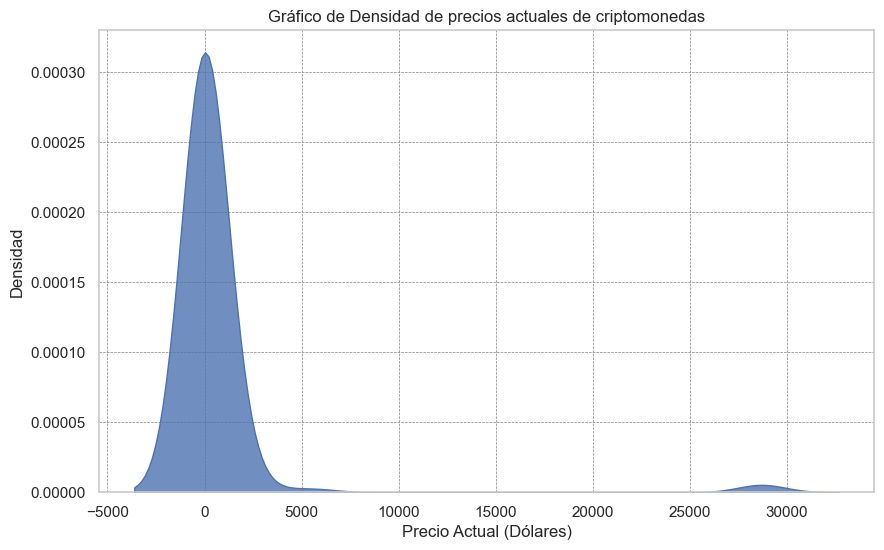

In [13]:
# Gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(df_coins_markets['current_price'], fill=True, alpha=0.8)
plt.xlabel('Precio Actual (Dólares)')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de precios actuales de criptomonedas')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.grid(True)
plt.show()

Este gráfico de densidad muestra la distribución de los precios actuales de las criptomonedas en dólares. La densidad es más alta en rangos de precios más bajos, con una disminución gradual hacia valores más altos. Esto sugiere que la mayoría de las criptomonedas tienen precios más bajos, mientras que unas pocas tienen precios mucho más altos.

---------------

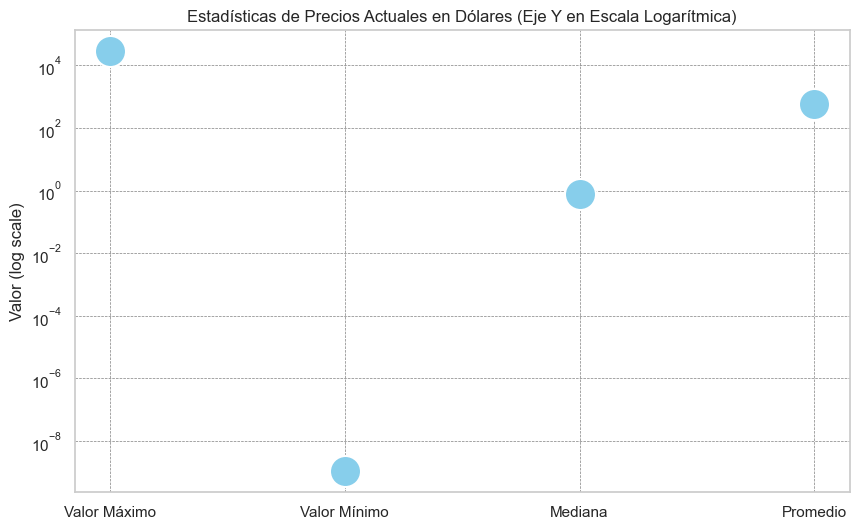

Precios Actuales en Dólares:
Valor Máximo: $29049.00
Valor Mínimo: $0.000000001123000
Mediana: $0.7663
Promedio: $581.29


In [14]:
# Estadísticas
max_price = df_coins_markets['current_price'].max()
min_price = df_coins_markets['current_price'].min()
median_price = df_coins_markets['current_price'].median()
mean_price = df_coins_markets['current_price'].mean()

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(["Valor Máximo", "Valor Mínimo", "Mediana", "Promedio"], [max_price, min_price, median_price, mean_price], color='skyblue', s=500)
plt.yscale('log')
plt.ylabel('Valor (log scale)')
plt.title('Estadísticas de Precios Actuales en Dólares (Eje Y en Escala Logarítmica)')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.setp(scatter, edgecolors='white', linewidth=1.5)  # Configurar bordes de los círculos
plt.show()

print("Precios Actuales en Dólares:")
print(f"Valor Máximo: ${max_price:.2f}")
print(f"Valor Mínimo: ${min_price:.15f}")  # Usar formato extendido para valores pequeños
print(f"Mediana: ${median_price:.4f}")
print(f"Promedio: ${mean_price:.2f}")


-------------

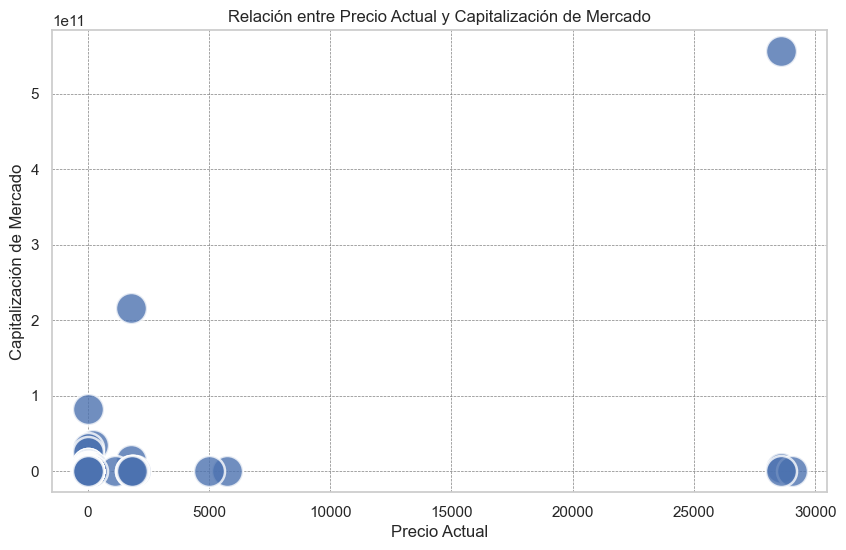

Resumen de Precios Actuales en Dólares:
Valor Máximo: $29049.00
Valor Mínimo: $0.00
Mediana: $0.7663
Promedio: $581.29


In [15]:
# Gráfico de dispersión entre el precio actual y la capitalización de mercado
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(x="current_price", y="market_cap", data=df_coins_markets, alpha=0.8, s=500)

plt.title("Relación entre Precio Actual y Capitalización de Mercado")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xlabel("Precio Actual")
plt.ylabel("Capitalización de Mercado")
plt.grid(True)
plt.show()

max_price = df_coins_markets['current_price'].max()
min_price = df_coins_markets['current_price'].min()
median_price = df_coins_markets['current_price'].median()
mean_price = df_coins_markets['current_price'].mean()

print("Resumen de Precios Actuales en Dólares:")
print(f"Valor Máximo: ${max_price:.2f}")
print(f"Valor Mínimo: ${min_price:.2f}")
print(f"Mediana: ${median_price:.4f}")
print(f"Promedio: ${mean_price:.2f}")

------------

In [16]:
# Ordenar el DataFrame original por market_cap_rank de menor a mayor
df_top_15_capitalizacion = df_coins_markets.sort_values(by='market_cap_rank').head(15)
df_top_15_capitalizacion.to_csv("../data/top_15_capitalizacion_actual.csv")

El DataFrame original ha sido ordenado por rango de capitalización de mercado de menor a mayor. Los primeros 15 registros, que representan las principales criptomonedas por capitalización, se han guardado en un archivo CSV llamado "top_15_capitalizacion_actual.csv".

In [17]:
df_top_15_capitalizacion

,id,symbol,name,current_price,market_cap,market_cap_rank,price_change_percentage_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath_change_percentage,atl_change_percentage
0,bitcoin,btc,Bitcoin,28586.000000,556404486447,1,-2.04958,-1.99680,1.945974e+07,2.100000e+07,2.100000e+07,-58.58942,4.206525e+04
1,ethereum,eth,Ethereum,1795.470000,215779763630,2,-1.68256,-1.63672,1.201359e+08,1.201359e+08,NaN,-63.18258,4.147124e+05
2,tether,usdt,Tether,0.998835,82920558742,3,0.00247,-0.18809,8.301725e+10,8.301725e+10,NaN,-24.50768,7.446266e+01
3,binancecoin,bnb,BNB,230.580000,35492713950,4,-2.35393,-2.30347,1.538562e+08,1.538562e+08,2.000000e+08,-66.38709,5.792596e+05
4,ripple,xrp,XRP,0.591038,31228846655,5,-3.52281,-3.20585,5.284187e+10,9.998850e+10,1.000000e+11,-82.61101,2.189966e+04
5,usd-coin,usdc,USD Coin,0.999362,26047994755,6,-0.05604,0.09529,2.605595e+10,2.605595e+10,NaN,-14.75322,1.390624e+01
6,staked-ether,steth,Lido Staked Ether,1794.040000,14625481604,7,-1.67908,-1.41713,8.149435e+06,8.149435e+06,8.149435e+06,-62.81451,2.719017e+02
7,cardano,ada,Cardano,0.276367,9688748992,8,-1.77935,-1.74409,3.504502e+10,4.500000e+10,4.500000e+10,-91.04406,1.335961e+03
8,dogecoin,doge,Dogecoin,0.067915,9550062810,9,-4.40080,-4.34851,1.406222e+11,1.406216e+11,NaN,-90.71564,7.805815e+04
9,solana,sol,Solana,23.240000,9466588697,10,-1.50716,-1.13985,4.073077e+08,5.551107e+08,NaN,-91.06226,4.539462e+03
